<a href="https://colab.research.google.com/github/JacoboGGLeon/pipeline/blob/main/Binary%20Classifier%20Pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classifier: Binary Classifier with Pytorch + Skorch

## References

* [Modeling Pipeline Optimization With scikit-learn](https://machinelearningmastery.com/modeling-pipeline-optimization-with-scikit-learn/)

* [Skorch - Quickstart](https://skorch.readthedocs.io/en/stable/user/quickstart.html)
* [Negative log likelihood explained](https://medium.com/deeplearningmadeeasy/negative-log-likelihood-6bd79b55d8b6)
* [Skorch - Basic usage](https://colab.research.google.com/github/skorch-dev/skorch/blob/master/notebooks/Basic_Usage.ipynb)

--------

## Aditional resources:
* [Sherin Thomas explains how to build a pipeline in PyTorch for deep learning workflows]()


## Notebook

### Noteboook requeriments

In [ ]:
! [ ! -z "$COLAB_GPU" ] && pip install torch skorch

     |████████████████████████████████| 128 kB 7.9 MB/s 


### Load libraries

In [ ]:
#importing the libraries
import torch
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
torch.manual_seed(0)
torch.cuda.manual_seed(0)

### Load data

In [ ]:
#importing the dataset
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X = data['data']
y = data['target']
print("shape of X: {}\nshape of y: {}".format(X.shape,y.shape))

shape of X: (569, 30)
shape of y: (569,)


### Preprocess data

In [ ]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [ ]:
X = X.astype(np.float32)
y = y.astype(np.int64)

### Modeling

In [ ]:
#defining the network
from torch import nn
from torch.nn import functional as F


class Net(nn.Module):
  def __init__(self,input_shape):
    super(Net,self).__init__()
    self.fc1 = nn.Linear(input_shape,32)
    self.fc2 = nn.Linear(32,64)
    self.fc3 = nn.Linear(64,2)
    
  def forward(self,x):
    x = torch.relu(self.fc1(x))
    x = torch.relu(self.fc2(x))
    x = torch.sigmoid(self.fc3(x))
    return x
  

In [ ]:
#hyper parameters
learning_rate = 0.01
epochs = 700

# Model , Optimizer, Loss
#model = Net(input_shape=x.shape[1])
#optimizer = torch.optim.SGD(model.parameters(),lr=learning_rate)
#loss_fn = nn.BCELoss()

from skorch import NeuralNetClassifier

net = NeuralNetClassifier(
    #ClassifierModule,
    Net(input_shape=X.shape[1]),
    max_epochs=epochs,
    lr=learning_rate, 
    device='cuda',  # uncomment this to train with CUDA

    # Shuffle training data on each epoch
    iterator_train__shuffle=True,
    
    # Optimizer
    optimizer=torch.optim.SGD,
    
    # Criterion
    criterion=torch.nn.NLLLoss,
)

#### Train

In [ ]:
net.fit(X, y)

  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        0.6451       0.6316        0.6399  0.0157
      2        0.6301       0.6579        0.6244  0.0169
      3        0.6154       0.6667        0.6093  0.0153
      4        0.6011       0.6579        0.5947  0.0151
      5        0.5872       0.6579        0.5804  0.0146
      6        0.5737       0.6579        0.5666  0.0150
      7        0.5606       0.6579        0.5531  0.0146
      8        0.5478       0.6579        0.5399  0.0151
      9        0.5352       0.6491        0.5270  0.0171
     10        0.5229       0.6579        0.5144  0.0145
     11        0.5109       0.6579        0.5022  0.0159
     12        0.4992       0.6579        0.4903  0.0149
     13        0.4877       0.6579        0.4786  0.0156
     14        0.4764       0.6579        0.4671  0.0215
     15        0.4653       0.6579        0.4559  0.0146
     16        0.4545       0.6

<class 'skorch.classifier.NeuralNetClassifier'>[initialized](
  module_=Net(
    (fc1): Linear(in_features=30, out_features=32, bias=True)
    (fc2): Linear(in_features=32, out_features=64, bias=True)
    (fc3): Linear(in_features=64, out_features=2, bias=True)
  ),
)

#### Results

In [ ]:
valid_loss = net.history[:, 'valid_loss']
valid_acc = net.history[:, 'valid_acc']

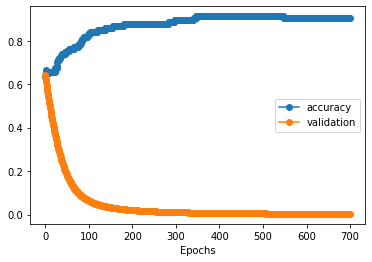

In [ ]:
#plotting the accuracy
plt.plot(valid_acc, 'o-', label='accuracy')
plt.plot(valid_loss, 'o-', label='validation')
#plt.title('Accuracy vs Epochs')
plt.xlabel('Epochs')
#plt.ylabel('loss')
plt.legend()
plt.show()